In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [ ]:
world_cup=pd.read_csv('WorldCupMatches.csv')
world_cup.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,France,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,USA,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,Yugoslavia win after extra time,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,Romania,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,Argentina,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [ ]:
df=pd.DataFrame(world_cup)
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,France,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,USA,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,Yugoslavia win after extra time,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,Romania,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,Argentina,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [ ]:
conditions = [(df['Home Team Goals']>df['Away Team Goals']),(df['Home Team Goals']<df['Away Team Goals'])]
Values=[df['Home Team Name'],df['Away Team Name']]
df['Winner']=np.select(conditions,Values)
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,France,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,France
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,USA,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,USA
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,Yugoslavia win after extra time,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,Yugoslavia
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,Romania,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,Romania
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,Argentina,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,Argentina


In [ ]:
argentine=world_cup[((world_cup['Home Team Name']=='Romania')|(world_cup['Away Team Name']=='Romania'))]
#mexico=world_cup[(world_cup['Home Team Name']=='Mexico')&(world_cup['Away Team Name']=='Argentina')]
ad=pd.DataFrame(argentine)
ad.head()
#me=pd.DataFrame(mexico)
#a=[[ad['Winner']]]
#b=[[me['Winner']]]
#

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,Romania,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,Romania
13,1930,21 Jul 1930 - 14:50,Group 3,Estadio Centenario,Montevideo,Uruguay,4,0,Romania,Uruguay win after extra time,70022.0,4,0,REGO Gilberto (BRA),WARNKEN Alberto (CHI),SAUCEDO Ulises (BOL),201,1100,URU,ROU,Uruguay
25,1934,27 May 1934 - 16:30,Preliminary round,Littorio,Trieste,Czechoslovakia,2,1,Romania,Czechoslovakia win after extra time,9000.0,0,1,LANGENUS Jean (BEL),SCARPI Giuseppe (ITA),SCORZONI Raffaele (ITA),204,1141,TCH,ROU,Czechoslovakia
38,1938,05 Jun 1938 - 17:00,First round,Stade Municipal,Toulouse,Cuba,3,3,Romania,Cuba,7000.0,0,0,SCARPI Giuseppe (ITA),VALPREDE Ferdinand (FRA),MERKCX Jean (FRA),206,1156,CUB,ROU,0
42,1938,09 Jun 1938 - 18:00,First round,Stade Municipal,Toulouse,Cuba,2,1,Romania,Cuba,8000.0,0,1,BIRLEM Alfred (GER),CAPDEVILLE Pierre (FRA),MARENCO Paul (FRA),206,1157,CUB,ROU,Cuba


In [ ]:
ht=ad.iloc[1]
hht=ht['Half-time Home Goals']
hat=ht['Half-time Away Goals']
print(hht,hat)

4 0


In [ ]:
#ab=plt.bar(labels, list(map(float, x[0])), align='edge', width=-0.5)
#ab=plt.bar(labels, list(map(float,x[1])), align='edge', width=-0.5)

In [ ]:
teams=['Uruguay','Russia','Saudi Arabia','Egypt','Spain','Portugal','Iran','Morocco','France','Denmark','Peru','Australia','Croatia','Argentina','Nigeria','Iceland','Brazil','Switzerland','Serbia','Costa Rica','Sweden','Mexico','Korea Republic','Germany','Belgium','England','Tunisia','Panama','Colombia','Japan','Senegal','Poland']
team1=argentine[argentine['Home Team Name'].isin(teams)]
team2=argentine[argentine['Away Team Name'].isin(teams)]
team=pd.concat((team1,team2))
team=team.drop_duplicates()

In [ ]:
team_result=team.drop(['Year','Datetime','Stage','Stadium','City','Win conditions','Attendance','Half-time Home Goals','Half-time Away Goals','Referee','Assistant 1','Assistant 2','RoundID','MatchID','Home Team Initials','Away Team Initials'],axis=1)
team_result.head()

,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner
13,Uruguay,4,0,Romania,Uruguay
203,England,1,0,Romania,England
218,Brazil,3,2,Romania,Brazil
436,Argentina,1,1,Romania,0
468,Colombia,1,3,Romania,Romania


In [ ]:
b=team_result.iloc[1]
av=b['Home Team Name']
c=b['Away Team Name']
print(av,c)

England Romania


In [ ]:
final_result= pd.get_dummies(team_result, prefix=['Home Team Name', 'Away Team Name'], columns=['Home Team Name', 'Away Team Name'])
final_result.head()

,Home Team Goals,Away Team Goals,Winner,Home Team Name_Argentina,Home Team Name_Brazil,Home Team Name_Colombia,Home Team Name_England,Home Team Name_Romania,Home Team Name_Uruguay,Away Team Name_Argentina,Away Team Name_Colombia,Away Team Name_Croatia,Away Team Name_England,Away Team Name_Peru,Away Team Name_Romania,Away Team Name_Sweden,Away Team Name_Switzerland,Away Team Name_Tunisia
13,4,0,Uruguay,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
203,1,0,England,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
218,3,2,Brazil,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
436,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
468,1,3,Romania,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X=np.asanyarray(final_result[['Home Team Goals']])
y=np.asanyarray(final_result[['Away Team Goals']])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
#X=final_result.drop(['Winner','Home Team Goals','Away Team Goals'],axis=1)
#y=final_result['Winner']
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn import metrics

model = linear_model.LinearRegression()
#model=LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print('Mean Absolute Error:%.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:%.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:%.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error:1.083
Mean Squared Error:1.528
Root Mean Squared Error:1.236


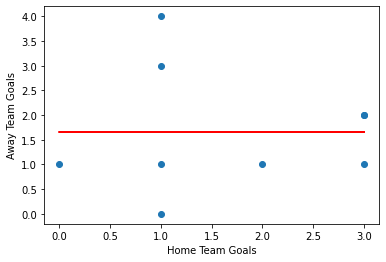

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color="red")
plt.xlabel("Home Team Goals")
plt.ylabel("Away Team Goals")
plt.show()

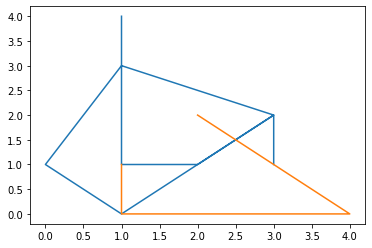

In [ ]:
x1=np.array(X_train)
y1=np.array(y_train)
x2=np.array(X_test)
y2=np.array(y_test)
plt.plot(x1, y1, x2, y2)
plt.show()

In [ ]:

#print('r2 score: '+str(r2_score(y_test, predictions)))
r2_score = model.score(X_test,y_test)
print((r2_score*100)*100,'%')

-12222.222222222219 %


In [ ]:
fd = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
fd

,Actual,Predicted
0,"[[1], [0], [0], [2]]","[[1.6666666666666667], [1.6666666666666667], [..."


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1.0833333333333333


In [ ]:
score=4
game=model.predict([[score]])

print(game)

[[1.66666667]]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
score=accuracy_score(y_test,y_pred)
score

1.0

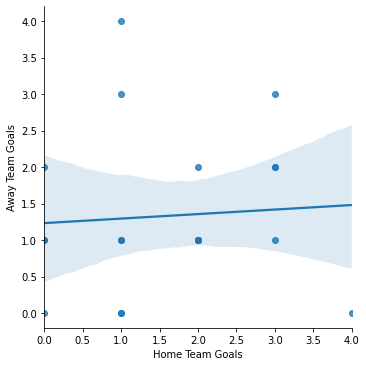

In [ ]:
g = sns.lmplot(x="Home Team Goals", y="Away Team Goals", data=argentine)

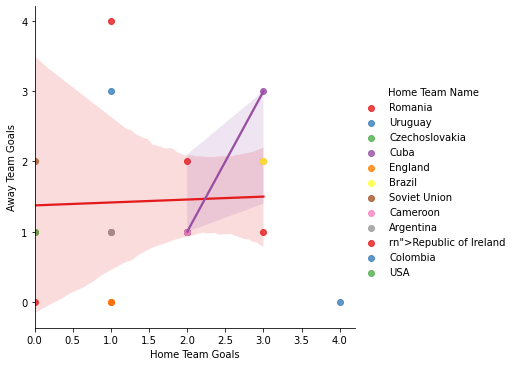

In [ ]:
g = sns.lmplot(x="Home Team Goals", y="Away Team Goals",hue="Home Team Name", data=argentine,palette="Set1")

Text(0.5, 1.0, 'Total Goals of Home Team')

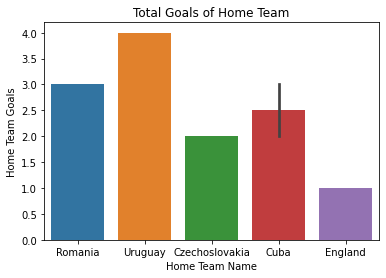

In [ ]:
abbc=ad.head(6)
sns.barplot(x = "Home Team Name", y = "Home Team Goals", data = abbc).set_title("Total Goals of Home Team")

Text(0.5, 1.0, 'Total Goals of Away Team')

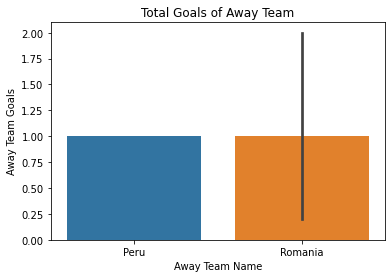

In [ ]:
sns.barplot(x = "Away Team Name", y = "Away Team Goals", data = abbc).set_title("Total Goals of Away Team")

In [ ]:
import matplotlib.mlab as mlab


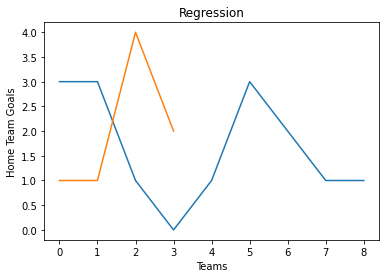

In [ ]:
plt.plot(X_train)
plt.plot(X_test)
plt.xlabel('Teams')
plt.ylabel('Home Team Goals')
plt.title('Regression')
plt.show()

In [ ]:
import matplotlib.pyplot as plt1
plt1.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
  plt1.rcParams[param] = '0.9'
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
  plt1.rcParams[param] = '#212946'

colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]

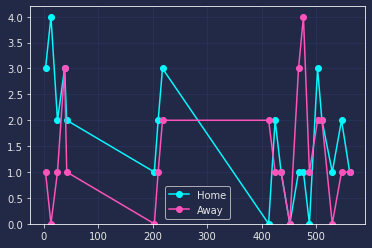

In [ ]:
fdd=ad[:20]
#af=pd.DataFrame({'Home':fdd['Home Team Goals'],'Away':fdd['Half-time Home Goals']})
af=pd.DataFrame({'Home':fdd['Home Team Goals'],'Away':fdd['Away Team Goals']})
fig, ax = plt.subplots()
af.plot(marker='o', color=colors, ax=ax)
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
#

#

ax.grid(color='#2A3459')

ax.set_xlim([ax.get_xlim()[0] - 0.2, ax.get_xlim()[1] + 0.2])
ax.set_ylim(0)

plt1.show()

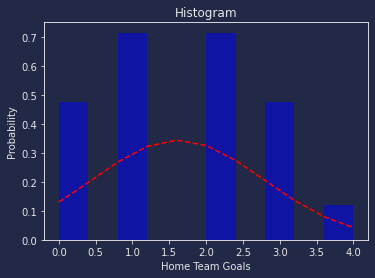

In [ ]:
import scipy.stats
fig,ax = plt.subplots(1,1)
m=ad['Home Team Goals'].mean()
x=np.array(ad['Home Team Goals'])
s=ad['Home Team Goals'].std()
#print(s)
num_bin=10
n, bins, patches = plt.hist(x, num_bin, density=True, facecolor='blue', alpha=0.5)
y = scipy.stats.norm.pdf(bins, m, s)
plt.plot(bins, y, 'r--')
plt.xlabel('Home Team Goals')
plt.ylabel('Probability')
plt.title(r'Histogram')
plt.subplots_adjust(left=0.15)

plt.show()